In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('Daily-train.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.iloc[0]

In [4]:
data = data.dropna()  # drop null values
data = data.to_frame()
#data

In [5]:
data.reset_index(inplace=True)

In [6]:
header_row = data.iloc[0]
data = pd.DataFrame(data.values[1:], columns=header_row)
data.head()

,V1,D1
0,V2,1017.1
1,V3,1019.3
2,V4,1017.0
3,V5,1019.2
4,V6,1018.7


<AxesSubplot:>

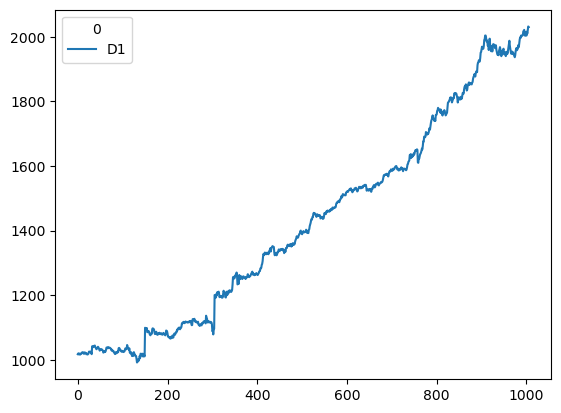

In [7]:
data.plot()

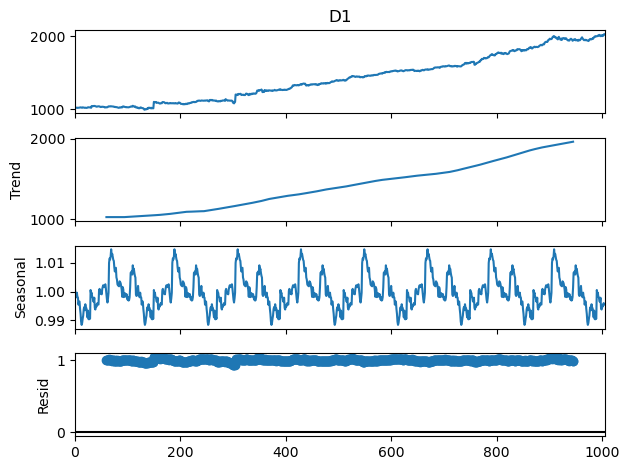

In [8]:
seasonal_decompose(data['D1'], model= 'multiplicative', period=120).plot();

In [9]:
train = data
test = pd.read_csv('Daily-test.csv')

In [10]:
test = test.iloc[0]

In [11]:
test = test.dropna()  # drop null values
test = test.to_frame()
#test

In [12]:
test.reset_index(inplace=True)

In [13]:
header_row = test.iloc[0]
test = pd.DataFrame(test.values[1:], columns=header_row)
test.head()

,V1,D1
0,V2,2039.2
1,V3,2035.0
2,V4,2051.8
3,V5,2061.8
4,V6,2063.5


In [14]:
test.set_index(pd.RangeIndex(start=train.index[-1]+1, stop=train.index[-1]+1+len(test)), inplace=True)
test.head()

,V1,D1
1006,V2,2039.2
1007,V3,2035.0
1008,V4,2051.8
1009,V5,2061.8
1010,V6,2063.5


In [15]:
train['D1'] = train['D1'].astype(float)


In [16]:
from statsmodels.tsa.holtwinters import Holt


model = Holt(train.D1, damped=True)
model_fit = model.fit(damping_slope=1)  # Adjust the damping_slope value as desired (between 0 and 1)
forecast = model_fit.forecast(10)  # Change 10 to the number of future periods you want to forecast

print(forecast)


1006    2031.086461
1007    2032.394842
1008    2033.703223
1009    2035.011604
1010    2036.319985
1011    2037.628367
1012    2038.936748
1013    2040.245129
1014    2041.553510
1015    2042.861891
dtype: float64


/var/folders/10/ylf9z1m51bq7ks0c7rh20vfw0000gn/T/ipykernel_7486/230368791.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train.D1, damped=True)
/Users/lamprosganias/opt/anaconda3/envs/ML/lib/python3.10/site-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


<AxesSubplot:>

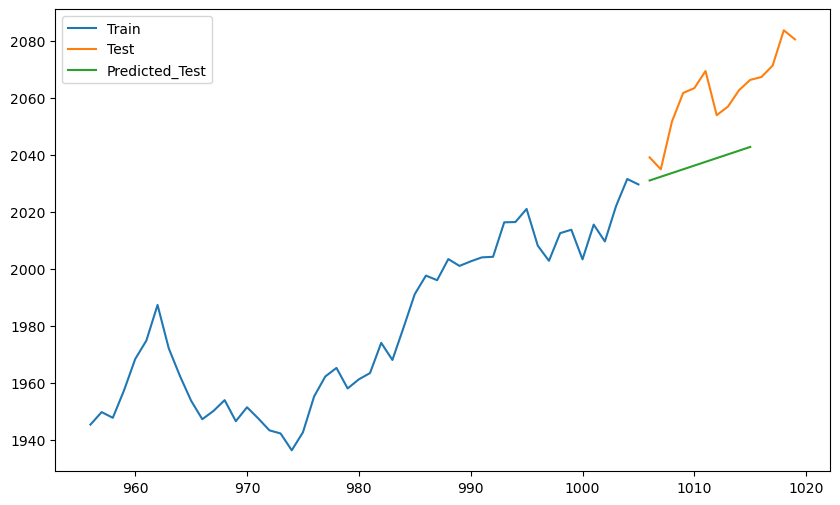

In [17]:
train['D1'].tail(50).plot(legend=True, label='Train',figsize=(10,6))
test['D1'].tail(50).plot(legend=True, label='Test')
forecast.plot(legend=True, label='Predicted_Test')

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

damped =  ExponentialSmoothing(train.D1,trend = 'add', damped = True, seasonal='mul', seasonal_periods=110).fit()


/var/folders/10/ylf9z1m51bq7ks0c7rh20vfw0000gn/T/ipykernel_7486/2109540314.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  damped =  ExponentialSmoothing(train.D1,trend = 'add', damped = True, seasonal='mul', seasonal_periods=110).fit()
/Users/lamprosganias/opt/anaconda3/envs/ML/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
test_pred = damped.forecast(14)

In [20]:
test_pred

1006    2036.311537
1007    2040.227279
1008    2044.101558
1009    2041.728213
1010    2045.457511
1011    2047.553498
1012    2042.327656
1013    2040.603396
1014    2042.040805
1015    2043.164357
1016    2044.101843
1017    2044.424423
1018    2051.158795
1019    2047.532944
dtype: float64

<AxesSubplot:>

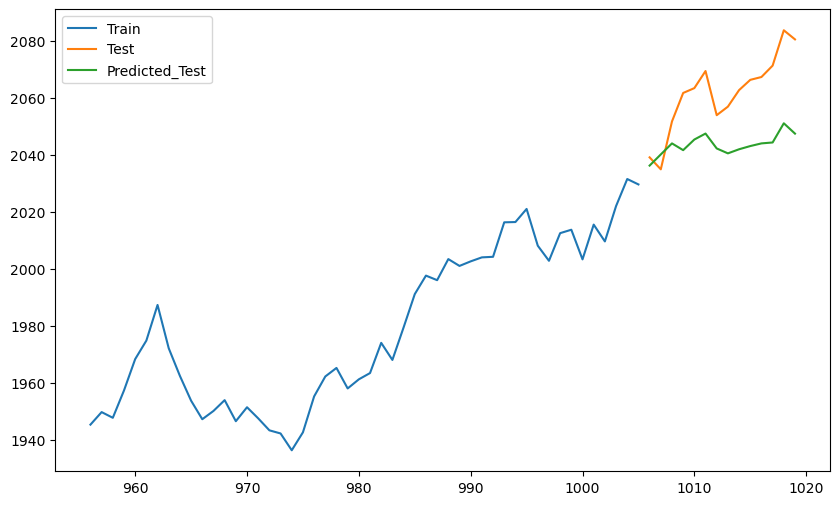

In [21]:
train['D1'].tail(50).plot(legend=True, label='Train',figsize=(10,6))
test['D1'].tail(50).plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Predicted_Test')